In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Reading Data

In [11]:
data1 = pd.read_csv('train_data.csv')

In [16]:
pca_titanic = PCA()
principalComponents_titanic = pca_titanic.fit_transform(data1)

In [17]:
principalComponents_titanic

array([[-5.59321427e+02, -8.59658342e-01],
       [-5.57907194e+02,  9.04928544e-01],
       [-5.56493243e+02,  9.60452290e-01],
       ...,
       [ 5.56493157e+02,  9.31163010e-03],
       [ 5.57907239e+02, -5.25988244e-01],
       [ 5.59321567e+02, -4.71276693e-01]])

Text(0, 0.5, 'Second Principal Component')

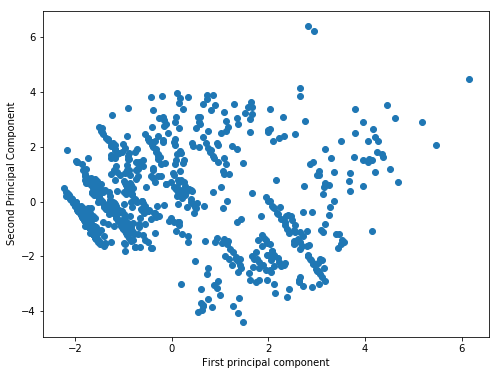

In [19]:
scaler = StandardScaler()
scaler.fit(data1)
scaled_data = scaler.transform(data1)

pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [7]:
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [44]:
data1.head()
list(data1.columns)

['Unnamed: 0',
 'PassengerId',
 'Survived',
 'Sex',
 'Age',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Family_size',
 'Title_1',
 'Title_2',
 'Title_3',
 'Title_4',
 'Emb_1',
 'Emb_2',
 'Emb_3']

# Building Model

In [47]:
y = data1['Survived']
x = data1.drop(['Survived'], axis=1)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

r_sq = logisticRegr.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8207070707070707


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Confusion Matrix

In [55]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[124  23]
 [ 24  67]]
